# General Description
The main procedure this notebook describes is given 6 different query results from Wikidata, which are saved in .csv format, how to filter out NaN values, duplicates etc and create a merged dataset. After all the code is executed, the merged dataset is saved as an .xlsx file, for visual inspections.

## Politicians' Dataset

In [5]:
import pandas as pd

# Load the dataset
file_path = 'POLITICIANS_DATASET.csv'
dataset = pd.read_csv(file_path)

# Filter out rows where the 'politicianLabel' column is numeric or is a single word
filtered_dataset = dataset[dataset['politicianLabel'].notna() & (dataset['politicianLabel'] != '')]
filtered_dataset = filtered_dataset[~filtered_dataset['politicianLabel'].str.isnumeric()]
filtered_dataset = filtered_dataset[filtered_dataset['politicianLabel'].str.contains(' ')]

filtered_dataset


,politician,politicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,description
0,http://www.wikidata.org/entity/Q567,Άνγκελα Μέρκελ,"φυσική, αναλυτική χημεία, πολιτική, θεωρητική ...",Q1611,1954-07-17T00:00:00Z,NaN,πρώην Καγκελάριος Ομοσπονδιακής Δημοκρατίας τη...
2,http://www.wikidata.org/entity/Q939,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z,Αυτοκράτορας της Βραζιλίας
3,http://www.wikidata.org/entity/Q939,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Ανάκτορο του Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z,Αυτοκράτορας της Βραζιλίας
4,http://www.wikidata.org/entity/Q989,Πάπας Ιωάννης Παύλος Β΄,"ποίηση, δράμα",Βαντοβίτσε,1920-05-18T00:00:00Z,2005-04-02T00:00:00Z,264ος Πάπας της Καθολικής Εκκλησίας
5,http://www.wikidata.org/entity/Q1001,Μαχάτμα Γκάντι,"φιλοσοφία, Πασιφισμός, νομική",Πορμπαντάρ,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z,Ινδός πολιτικός και θρησκευτικός ηγέτης
...,...,...,...,...,...,...,...
960,http://www.wikidata.org/entity/Q68751,Γιόχαν φον Λιρς,"αντισημιτισμός, ναζιστική προπαγάνδα",Q542067,1902-01-25T00:00:00Z,1965-03-05T00:00:00Z,NaN
995,http://www.wikidata.org/entity/Q156473,Φέρεντς Σάλασι,ναζισμός,Κόσιτσε,1897-01-06T00:00:00Z,1946-03-12T00:00:00Z,NaN
996,http://www.wikidata.org/entity/Q157242,Αλεξάντερ Τοντ,οργανική χημεία,Γλασκώβη,1907-10-02T00:00:00Z,1997-01-10T00:00:00Z,NaN
997,http://www.wikidata.org/entity/Q158030,Κορνήλιος Καστοριάδης,"μαρξισμός, οικονομικά, Ηπειρωτική φιλοσοφία",Κωνσταντινούπολη,1922-03-11T00:00:00Z,1997-12-26T00:00:00Z,Έλληνας φιλόσοφος


In [6]:
# Remove the columns 'politician' and 'description'
filtered_dataset = filtered_dataset.drop(columns=['politician', 'description'])

# Display the filtered dataset
filtered_dataset


,politicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
0,Άνγκελα Μέρκελ,"φυσική, αναλυτική χημεία, πολιτική, θεωρητική ...",Q1611,1954-07-17T00:00:00Z,NaN
2,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z
3,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Ανάκτορο του Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z
4,Πάπας Ιωάννης Παύλος Β΄,"ποίηση, δράμα",Βαντοβίτσε,1920-05-18T00:00:00Z,2005-04-02T00:00:00Z
5,Μαχάτμα Γκάντι,"φιλοσοφία, Πασιφισμός, νομική",Πορμπαντάρ,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z
...,...,...,...,...,...
960,Γιόχαν φον Λιρς,"αντισημιτισμός, ναζιστική προπαγάνδα",Q542067,1902-01-25T00:00:00Z,1965-03-05T00:00:00Z
995,Φέρεντς Σάλασι,ναζισμός,Κόσιτσε,1897-01-06T00:00:00Z,1946-03-12T00:00:00Z
996,Αλεξάντερ Τοντ,οργανική χημεία,Γλασκώβη,1907-10-02T00:00:00Z,1997-01-10T00:00:00Z
997,Κορνήλιος Καστοριάδης,"μαρξισμός, οικονομικά, Ηπειρωτική φιλοσοφία",Κωνσταντινούπολη,1922-03-11T00:00:00Z,1997-12-26T00:00:00Z


In [7]:
# Keep only the rows with unique 'politicianLabel'
filtered_dataset = filtered_dataset.drop_duplicates(subset='politicianLabel')

filtered_dataset

,politicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
0,Άνγκελα Μέρκελ,"φυσική, αναλυτική χημεία, πολιτική, θεωρητική ...",Q1611,1954-07-17T00:00:00Z,NaN
2,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z
4,Πάπας Ιωάννης Παύλος Β΄,"ποίηση, δράμα",Βαντοβίτσε,1920-05-18T00:00:00Z,2005-04-02T00:00:00Z
5,Μαχάτμα Γκάντι,"φιλοσοφία, Πασιφισμός, νομική",Πορμπαντάρ,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z
6,Ναρέντρα Μόντι,"φιλοσοφία, πολιτική, κοινωνική αλλαγή",Q2570726,1950-09-17T00:00:00Z,NaN
...,...,...,...,...,...
960,Γιόχαν φον Λιρς,"αντισημιτισμός, ναζιστική προπαγάνδα",Q542067,1902-01-25T00:00:00Z,1965-03-05T00:00:00Z
995,Φέρεντς Σάλασι,ναζισμός,Κόσιτσε,1897-01-06T00:00:00Z,1946-03-12T00:00:00Z
996,Αλεξάντερ Τοντ,οργανική χημεία,Γλασκώβη,1907-10-02T00:00:00Z,1997-01-10T00:00:00Z
997,Κορνήλιος Καστοριάδης,"μαρξισμός, οικονομικά, Ηπειρωτική φιλοσοφία",Κωνσταντινούπολη,1922-03-11T00:00:00Z,1997-12-26T00:00:00Z


In [8]:
filtered_dataset = filtered_dataset[~filtered_dataset['placeOfBirthLabel'].str.startswith('Q')]
filtered_dataset = filtered_dataset[filtered_dataset['dateOfDeath'].notna()]

filtered_dataset

,politicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
2,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z
4,Πάπας Ιωάννης Παύλος Β΄,"ποίηση, δράμα",Βαντοβίτσε,1920-05-18T00:00:00Z,2005-04-02T00:00:00Z
5,Μαχάτμα Γκάντι,"φιλοσοφία, Πασιφισμός, νομική",Πορμπαντάρ,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z
7,Δάντης Αλιγκιέρι,"ποίηση, γλωσσολογία, λογοτεχνία, πολιτική φιλο...",Φλωρεντία,1265-01-01T00:00:00Z,1321-09-22T00:00:00Z
8,Αλεσσάντρο Μαντσόνι,"ποίηση, δράμα",Μιλάνο,1785-03-07T00:00:00Z,1873-05-22T00:00:00Z
...,...,...,...,...,...
959,Καρλ Χάινριχ Μπέκερ,"Ισλάμ, φιλοσοφία",Άμστερνταμ,1876-04-12T00:00:00Z,1933-02-10T00:00:00Z
995,Φέρεντς Σάλασι,ναζισμός,Κόσιτσε,1897-01-06T00:00:00Z,1946-03-12T00:00:00Z
996,Αλεξάντερ Τοντ,οργανική χημεία,Γλασκώβη,1907-10-02T00:00:00Z,1997-01-10T00:00:00Z
997,Κορνήλιος Καστοριάδης,"μαρξισμός, οικονομικά, Ηπειρωτική φιλοσοφία",Κωνσταντινούπολη,1922-03-11T00:00:00Z,1997-12-26T00:00:00Z


In [9]:
# Create the new column 'Περιγραφή'
filtered_dataset['Περιγραφή'] = (
    filtered_dataset['politicianLabel'] + ' ασχολήθηκε με τα πεδία ' + filtered_dataset['fields'] +
    '. Γεννήθηκε στο ' + filtered_dataset['placeOfBirthLabel'] + ' στις ' + filtered_dataset['dateOfBirth'].str[:10] +
    ' και πέθανε στις ' + filtered_dataset['dateOfDeath'].str[:10] + '.'
)


filtered_dataset

,politicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,Περιγραφή
2,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z,Πέτρος Α΄ της Βραζιλίας ασχολήθηκε με τα πεδία...
4,Πάπας Ιωάννης Παύλος Β΄,"ποίηση, δράμα",Βαντοβίτσε,1920-05-18T00:00:00Z,2005-04-02T00:00:00Z,Πάπας Ιωάννης Παύλος Β΄ ασχολήθηκε με τα πεδία...
5,Μαχάτμα Γκάντι,"φιλοσοφία, Πασιφισμός, νομική",Πορμπαντάρ,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z,Μαχάτμα Γκάντι ασχολήθηκε με τα πεδία φιλοσοφί...
7,Δάντης Αλιγκιέρι,"ποίηση, γλωσσολογία, λογοτεχνία, πολιτική φιλο...",Φλωρεντία,1265-01-01T00:00:00Z,1321-09-22T00:00:00Z,Δάντης Αλιγκιέρι ασχολήθηκε με τα πεδία ποίηση...
8,Αλεσσάντρο Μαντσόνι,"ποίηση, δράμα",Μιλάνο,1785-03-07T00:00:00Z,1873-05-22T00:00:00Z,Αλεσσάντρο Μαντσόνι ασχολήθηκε με τα πεδία ποί...
...,...,...,...,...,...,...
959,Καρλ Χάινριχ Μπέκερ,"Ισλάμ, φιλοσοφία",Άμστερνταμ,1876-04-12T00:00:00Z,1933-02-10T00:00:00Z,Καρλ Χάινριχ Μπέκερ ασχολήθηκε με τα πεδία Ισλ...
995,Φέρεντς Σάλασι,ναζισμός,Κόσιτσε,1897-01-06T00:00:00Z,1946-03-12T00:00:00Z,Φέρεντς Σάλασι ασχολήθηκε με τα πεδία ναζισμός...
996,Αλεξάντερ Τοντ,οργανική χημεία,Γλασκώβη,1907-10-02T00:00:00Z,1997-01-10T00:00:00Z,Αλεξάντερ Τοντ ασχολήθηκε με τα πεδία οργανική...
997,Κορνήλιος Καστοριάδης,"μαρξισμός, οικονομικά, Ηπειρωτική φιλοσοφία",Κωνσταντινούπολη,1922-03-11T00:00:00Z,1997-12-26T00:00:00Z,Κορνήλιος Καστοριάδης ασχολήθηκε με τα πεδία μ...


In [41]:
# Rename columns
filtered_politicians_dataset = filtered_dataset.rename(columns={
    'politicianLabel': 'Όνομα',
    'fields': 'Πεδίο',
    'placeOfBirthLabel': 'Τόπος Γέννησης',
    'dateOfBirth': 'Ημερομηνία Γέννησης',
    'dateOfDeath': 'Ημερομηνία Θανάτου'
})

filtered_politicians_dataset

,Όνομα,Πεδίο,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου,Περιγραφή
2,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Κελούζ,1798-10-12T00:00:00Z,1834-09-24T00:00:00Z,Πέτρος Α΄ της Βραζιλίας ασχολήθηκε με τα πεδία...
4,Πάπας Ιωάννης Παύλος Β΄,"ποίηση, δράμα",Βαντοβίτσε,1920-05-18T00:00:00Z,2005-04-02T00:00:00Z,Πάπας Ιωάννης Παύλος Β΄ ασχολήθηκε με τα πεδία...
5,Μαχάτμα Γκάντι,"φιλοσοφία, Πασιφισμός, νομική",Πορμπαντάρ,1869-10-02T00:00:00Z,1948-01-30T00:00:00Z,Μαχάτμα Γκάντι ασχολήθηκε με τα πεδία φιλοσοφί...
7,Δάντης Αλιγκιέρι,"ποίηση, γλωσσολογία, λογοτεχνία, πολιτική φιλο...",Φλωρεντία,1265-01-01T00:00:00Z,1321-09-22T00:00:00Z,Δάντης Αλιγκιέρι ασχολήθηκε με τα πεδία ποίηση...
8,Αλεσσάντρο Μαντσόνι,"ποίηση, δράμα",Μιλάνο,1785-03-07T00:00:00Z,1873-05-22T00:00:00Z,Αλεσσάντρο Μαντσόνι ασχολήθηκε με τα πεδία ποί...
...,...,...,...,...,...,...
959,Καρλ Χάινριχ Μπέκερ,"Ισλάμ, φιλοσοφία",Άμστερνταμ,1876-04-12T00:00:00Z,1933-02-10T00:00:00Z,Καρλ Χάινριχ Μπέκερ ασχολήθηκε με τα πεδία Ισλ...
995,Φέρεντς Σάλασι,ναζισμός,Κόσιτσε,1897-01-06T00:00:00Z,1946-03-12T00:00:00Z,Φέρεντς Σάλασι ασχολήθηκε με τα πεδία ναζισμός...
996,Αλεξάντερ Τοντ,οργανική χημεία,Γλασκώβη,1907-10-02T00:00:00Z,1997-01-10T00:00:00Z,Αλεξάντερ Τοντ ασχολήθηκε με τα πεδία οργανική...
997,Κορνήλιος Καστοριάδης,"μαρξισμός, οικονομικά, Ηπειρωτική φιλοσοφία",Κωνσταντινούπολη,1922-03-11T00:00:00Z,1997-12-26T00:00:00Z,Κορνήλιος Καστοριάδης ασχολήθηκε με τα πεδία μ...


## Authors' dataset

In [12]:
import pandas as pd

# Load the dataset
file_path = 'AUTHORS_DATASET.csv'
authors_dataset = pd.read_csv(file_path)

# Filter out rows where the 'authorLabel' column is numeric or is a single word
filtered_authors_dataset = authors_dataset[authors_dataset['authorLabel'].notna() & (authors_dataset['authorLabel'] != '')]
filtered_authors_dataset = filtered_authors_dataset[~filtered_authors_dataset['authorLabel'].str.isnumeric()]
filtered_authors_dataset = filtered_authors_dataset[filtered_authors_dataset['authorLabel'].str.contains(' ')]

authors_dataset

,author,authorLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,description
0,http://www.wikidata.org/entity/Q67449,Q67449,"ψυχιατρική, ψυχανάλυση, νευρολογία",Μόναχο,1908-09-20T00:00:00Z,1982-06-26T00:00:00Z,NaN
1,http://www.wikidata.org/entity/Q68121,Καρλ Χάινριχ Μπέκερ,"Ισλάμ, φιλοσοφία",Άμστερνταμ,1876-04-12T00:00:00Z,1933-02-10T00:00:00Z,Γερμανός οριενταλιστής και πολιτικός
2,http://www.wikidata.org/entity/Q69936,Q69936,σκάκι,Αμβούργο,1970-01-01T00:00:00Z,NaN,NaN
3,http://www.wikidata.org/entity/Q69936,Q69936,σκάκι,Αμβούργο,1970-11-23T00:00:00Z,NaN,NaN
4,http://www.wikidata.org/entity/Q70767,Ερνστ Νίκις,"πολιτική, λογοτεχνία, εκδοτικός οίκος",Τσεμπνίτσα,1889-05-23T00:00:00Z,1967-05-23T00:00:00Z,NaN
...,...,...,...,...,...,...,...
995,http://www.wikidata.org/entity/Q834926,Q834926,"ποίηση, ταινία, εννοιολογική τέχνη, εικονογράφηση",Σαιν-Ζιλ,1924-01-28T00:00:00Z,1976-01-28T00:00:00Z,NaN
996,http://www.wikidata.org/entity/Q888225,Q888225,Κόμικς,Νέα Υόρκη,1951-04-04T00:00:00Z,NaN,NaN
997,http://www.wikidata.org/entity/Q893606,Q893606,Υδροδυναμική,Τιφλίδα,1880-05-14T00:00:00Z,1951-07-21T00:00:00Z,NaN
998,http://www.wikidata.org/entity/Q912956,Q912956,τζαζ,Μάντσεστερ,1940-07-10T00:00:00Z,NaN,NaN


In [13]:
# Remove the columns 'author' and 'description'
filtered_authors_dataset = filtered_authors_dataset.drop(columns=['author', 'description'])

# Keep only the rows with unique 'authorLabel'
filtered_authors_dataset = filtered_authors_dataset.drop_duplicates(subset='authorLabel')

filtered_authors_dataset

,authorLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
1,Καρλ Χάινριχ Μπέκερ,"Ισλάμ, φιλοσοφία",Άμστερνταμ,1876-04-12T00:00:00Z,1933-02-10T00:00:00Z
4,Ερνστ Νίκις,"πολιτική, λογοτεχνία, εκδοτικός οίκος",Τσεμπνίτσα,1889-05-23T00:00:00Z,1967-05-23T00:00:00Z
7,Βίλχελμ Φέρστερ,"αστρονομία, φυσική, μαθηματικά",Ζιελόνα Γκούρα,1832-12-16T00:00:00Z,1921-01-18T00:00:00Z
8,Ρίχαρντ φον Κραφτ-Εμπίνγκ,"ψυχιατρική, Σεξολογία, νευρολογία",Μάνχαϊμ,1840-08-14T00:00:00Z,1902-12-22T00:00:00Z
10,Άννα Αχμάτοβα,ποίηση,Οδησσός,1889-06-23T00:00:00Z,1966-03-05T00:00:00Z
...,...,...,...,...,...
955,Σούζι Μπράιτ,Φεμινιστικό κίνημα,Κομητεία Άρλινγκτον,1958-03-25T00:00:00Z,NaN
978,Αλεξέι Αντζουμπέι,"δημοσιογραφία, δημοσιογραφία γνώμης, επεξεργασ...",Σαμαρκάνδη,1924-01-09T00:00:00Z,1993-03-19T00:00:00Z
983,Στεφάν Ντιόν,πολιτική επιστήμη,Κεμπέκ,1955-09-28T00:00:00Z,NaN
985,Λίντα Νόχλιν,"Μοντέρνα τέχνη, Ιστορία της Τέχνης",Μπρούκλιν,1931-01-30T00:00:00Z,2017-10-29T00:00:00Z


In [15]:
# Filter out rows where 'placeOfBirthLabel' is not a word (e.g., contains 'Q') and 'dateOfDeath' is NaN
filtered_authors_dataset = filtered_authors_dataset[~filtered_authors_dataset['placeOfBirthLabel'].str.startswith('Q')]
filtered_authors_dataset = filtered_authors_dataset[filtered_authors_dataset['dateOfDeath'].notna()]

filtered_authors_dataset

,authorLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
1,Καρλ Χάινριχ Μπέκερ,"Ισλάμ, φιλοσοφία",Άμστερνταμ,1876-04-12T00:00:00Z,1933-02-10T00:00:00Z
4,Ερνστ Νίκις,"πολιτική, λογοτεχνία, εκδοτικός οίκος",Τσεμπνίτσα,1889-05-23T00:00:00Z,1967-05-23T00:00:00Z
7,Βίλχελμ Φέρστερ,"αστρονομία, φυσική, μαθηματικά",Ζιελόνα Γκούρα,1832-12-16T00:00:00Z,1921-01-18T00:00:00Z
8,Ρίχαρντ φον Κραφτ-Εμπίνγκ,"ψυχιατρική, Σεξολογία, νευρολογία",Μάνχαϊμ,1840-08-14T00:00:00Z,1902-12-22T00:00:00Z
10,Άννα Αχμάτοβα,ποίηση,Οδησσός,1889-06-23T00:00:00Z,1966-03-05T00:00:00Z
18,Γερτρούδη Στάιν,ποίηση,Αλεγκέινι,1874-02-03T00:00:00Z,1946-07-27T00:00:00Z
19,Φίλων ο Αλεξανδρεύς,φιλοσοφία,Αλεξάνδρεια,-0014-01-01T00:00:00Z,0050-01-01T00:00:00Z
21,Φραντς Λέχαρ,"μουσική, θέατρο",Κομάρομ,1870-04-30T00:00:00Z,1948-10-24T00:00:00Z
23,Αντρέι Ζντάνοβ,"πολιτική, ιδεολογία, Σοσιαλιστικός ρεαλισμός, ...",Μαριούπολη,1896-02-26T00:00:00Z,1948-08-31T00:00:00Z
33,Λέοναρντ Κόεν,"ποίηση, μουσική",Μόντρεαλ,1934-09-21T00:00:00Z,2016-11-07T00:00:00Z


In [16]:
# Rename columns
filtered_authors_dataset = filtered_authors_dataset.rename(columns={
    'authorLabel': 'Όνομα',
    'fields': 'Πεδίο',
    'placeOfBirthLabel': 'Τόπος Γέννησης',
    'dateOfBirth': 'Ημερομηνία Γέννησης',
    'dateOfDeath': 'Ημερομηνία Θανάτου'
})

filtered_authors_dataset

,Όνομα,Πεδίο,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου
1,Καρλ Χάινριχ Μπέκερ,"Ισλάμ, φιλοσοφία",Άμστερνταμ,1876-04-12T00:00:00Z,1933-02-10T00:00:00Z
4,Ερνστ Νίκις,"πολιτική, λογοτεχνία, εκδοτικός οίκος",Τσεμπνίτσα,1889-05-23T00:00:00Z,1967-05-23T00:00:00Z
7,Βίλχελμ Φέρστερ,"αστρονομία, φυσική, μαθηματικά",Ζιελόνα Γκούρα,1832-12-16T00:00:00Z,1921-01-18T00:00:00Z
8,Ρίχαρντ φον Κραφτ-Εμπίνγκ,"ψυχιατρική, Σεξολογία, νευρολογία",Μάνχαϊμ,1840-08-14T00:00:00Z,1902-12-22T00:00:00Z
10,Άννα Αχμάτοβα,ποίηση,Οδησσός,1889-06-23T00:00:00Z,1966-03-05T00:00:00Z
18,Γερτρούδη Στάιν,ποίηση,Αλεγκέινι,1874-02-03T00:00:00Z,1946-07-27T00:00:00Z
19,Φίλων ο Αλεξανδρεύς,φιλοσοφία,Αλεξάνδρεια,-0014-01-01T00:00:00Z,0050-01-01T00:00:00Z
21,Φραντς Λέχαρ,"μουσική, θέατρο",Κομάρομ,1870-04-30T00:00:00Z,1948-10-24T00:00:00Z
23,Αντρέι Ζντάνοβ,"πολιτική, ιδεολογία, Σοσιαλιστικός ρεαλισμός, ...",Μαριούπολη,1896-02-26T00:00:00Z,1948-08-31T00:00:00Z
33,Λέοναρντ Κόεν,"ποίηση, μουσική",Μόντρεαλ,1934-09-21T00:00:00Z,2016-11-07T00:00:00Z


In [17]:
row_count = filtered_authors_dataset.shape[0]
print(f"Number of rows: {row_count}")


Number of rows: 56


## Scientists' dataset

In [18]:
import pandas as pd

# Load the dataset
file_path = 'SCIENTISTS_DATASET.csv'
scientists_dataset = pd.read_csv(file_path)

# Filter out rows where the 'scientistLabel' column is numeric or is a single word
filtered_scientists_dataset = scientists_dataset[scientists_dataset['scientistLabel'].notna() & (scientists_dataset['scientistLabel'] != '')]
filtered_scientists_dataset = filtered_scientists_dataset[~filtered_scientists_dataset['scientistLabel'].str.isnumeric()]
filtered_scientists_dataset = filtered_scientists_dataset[filtered_scientists_dataset['scientistLabel'].str.contains(' ')]

filtered_scientists_dataset

,scientist,scientistLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,description
0,http://www.wikidata.org/entity/Q563553,Πιερ Σαρλ Λεμονιέ,"φυσική, αστρονομία",Παρίσι,1715-11-20T00:00:00Z,1799-04-03T00:00:00Z,Γάλλος αστρονόμος
1,http://www.wikidata.org/entity/Q268702,Μαίρη Σόμερβιλ,"εκλαϊκευμένη επιστήμη, μαθηματικά",Q1012401,1780-12-26T00:00:00Z,1872-11-28T00:00:00Z,Βρετανός επιστημονικός συγγραφέας και πολυμαθής
2,http://www.wikidata.org/entity/Q289217,Ετιέν-Ζυλ Μαρέ,"φωτογραφία, ιατρική, φυσιολογία",Μπων,1830-03-05T00:00:00Z,1904-05-15T00:00:00Z,"Γάλλος γιατρός, εφευρέτης της χρονοφωτογραφίας"
3,http://www.wikidata.org/entity/Q77051,Φρήντριχ Τίτγεν,"μαθηματικά, αστρονομία",Q15056265,1832-10-15T00:00:00Z,1895-06-21T00:00:00Z,Γερμανός αστρονόμος
4,http://www.wikidata.org/entity/Q706703,Άρτεμις Αλεξιάδου,"Ψηφιακές Ανθρωπιστικές Επιστήμες, αγγλική φιλο...",Βόλος,1969-02-13T00:00:00Z,NaN,Ελληνίδα γλωσσολόγος και πανεπιστημιακός
...,...,...,...,...,...,...,...
8603,http://www.wikidata.org/entity/Q58328,Ζαν-Μπατίστ Μπιό,φυσική,Παρίσι,1774-04-21T00:00:00Z,1862-02-03T00:00:00Z,Γάλλος επιστήμονας
8604,http://www.wikidata.org/entity/Q58720,Μιχαήλ Λομονόσοφ,"φυσική ιστορία, ορυκτολογία, φιλολογία, μεταλλ...",Q122258199,1711-11-19T00:00:00Z,1765-04-15T00:00:00Z,"Ρώσος επιστήμονας, συγγραφέας και μαθηματικός"
8605,http://www.wikidata.org/entity/Q62891,Χάικε Κάμερλιν,"froid, υπεραγωγιμότητα, ιστορία της επιστήμης,...",Χρόνινγκεν,1853-09-21T00:00:00Z,1926-02-21T00:00:00Z,"Ολλανδός φυσικός, βραβευμένος με Νόμπελ Φυσική..."
8607,http://www.wikidata.org/entity/Q9353,Τζων Λοκ,"πολιτική φιλοσοφία, ιατρική, γνωσιολογία, φιλο...",Q1825419,1632-08-29T00:00:00Z,1704-10-28T00:00:00Z,Βρετανος φιλόσοφος


In [19]:
# Remove the columns 'scientist' and 'description'
filtered_scientists_dataset = filtered_scientists_dataset.drop(columns=['scientist', 'description'])

filtered_scientists_dataset

,scientistLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
0,Πιερ Σαρλ Λεμονιέ,"φυσική, αστρονομία",Παρίσι,1715-11-20T00:00:00Z,1799-04-03T00:00:00Z
1,Μαίρη Σόμερβιλ,"εκλαϊκευμένη επιστήμη, μαθηματικά",Q1012401,1780-12-26T00:00:00Z,1872-11-28T00:00:00Z
2,Ετιέν-Ζυλ Μαρέ,"φωτογραφία, ιατρική, φυσιολογία",Μπων,1830-03-05T00:00:00Z,1904-05-15T00:00:00Z
3,Φρήντριχ Τίτγεν,"μαθηματικά, αστρονομία",Q15056265,1832-10-15T00:00:00Z,1895-06-21T00:00:00Z
4,Άρτεμις Αλεξιάδου,"Ψηφιακές Ανθρωπιστικές Επιστήμες, αγγλική φιλο...",Βόλος,1969-02-13T00:00:00Z,NaN
...,...,...,...,...,...
8603,Ζαν-Μπατίστ Μπιό,φυσική,Παρίσι,1774-04-21T00:00:00Z,1862-02-03T00:00:00Z
8604,Μιχαήλ Λομονόσοφ,"φυσική ιστορία, ορυκτολογία, φιλολογία, μεταλλ...",Q122258199,1711-11-19T00:00:00Z,1765-04-15T00:00:00Z
8605,Χάικε Κάμερλιν,"froid, υπεραγωγιμότητα, ιστορία της επιστήμης,...",Χρόνινγκεν,1853-09-21T00:00:00Z,1926-02-21T00:00:00Z
8607,Τζων Λοκ,"πολιτική φιλοσοφία, ιατρική, γνωσιολογία, φιλο...",Q1825419,1632-08-29T00:00:00Z,1704-10-28T00:00:00Z


In [20]:
# Keep only the rows with unique 'scientistLabel'
filtered_scientists_dataset = filtered_scientists_dataset.drop_duplicates(subset='scientistLabel')

filtered_scientists_dataset

,scientistLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
0,Πιερ Σαρλ Λεμονιέ,"φυσική, αστρονομία",Παρίσι,1715-11-20T00:00:00Z,1799-04-03T00:00:00Z
1,Μαίρη Σόμερβιλ,"εκλαϊκευμένη επιστήμη, μαθηματικά",Q1012401,1780-12-26T00:00:00Z,1872-11-28T00:00:00Z
2,Ετιέν-Ζυλ Μαρέ,"φωτογραφία, ιατρική, φυσιολογία",Μπων,1830-03-05T00:00:00Z,1904-05-15T00:00:00Z
3,Φρήντριχ Τίτγεν,"μαθηματικά, αστρονομία",Q15056265,1832-10-15T00:00:00Z,1895-06-21T00:00:00Z
4,Άρτεμις Αλεξιάδου,"Ψηφιακές Ανθρωπιστικές Επιστήμες, αγγλική φιλο...",Βόλος,1969-02-13T00:00:00Z,NaN
...,...,...,...,...,...
8603,Ζαν-Μπατίστ Μπιό,φυσική,Παρίσι,1774-04-21T00:00:00Z,1862-02-03T00:00:00Z
8604,Μιχαήλ Λομονόσοφ,"φυσική ιστορία, ορυκτολογία, φιλολογία, μεταλλ...",Q122258199,1711-11-19T00:00:00Z,1765-04-15T00:00:00Z
8605,Χάικε Κάμερλιν,"froid, υπεραγωγιμότητα, ιστορία της επιστήμης,...",Χρόνινγκεν,1853-09-21T00:00:00Z,1926-02-21T00:00:00Z
8607,Τζων Λοκ,"πολιτική φιλοσοφία, ιατρική, γνωσιολογία, φιλο...",Q1825419,1632-08-29T00:00:00Z,1704-10-28T00:00:00Z


In [21]:
# Filter out rows where 'placeOfBirthLabel' is not a word (e.g., contains 'Q') and 'dateOfDeath' is NaN
filtered_scientists_dataset = filtered_scientists_dataset[~filtered_scientists_dataset['placeOfBirthLabel'].str.startswith('Q')]
filtered_scientists_dataset = filtered_scientists_dataset[filtered_scientists_dataset['dateOfDeath'].notna()]

filtered_scientists_dataset

,scientistLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
0,Πιερ Σαρλ Λεμονιέ,"φυσική, αστρονομία",Παρίσι,1715-11-20T00:00:00Z,1799-04-03T00:00:00Z
2,Ετιέν-Ζυλ Μαρέ,"φωτογραφία, ιατρική, φυσιολογία",Μπων,1830-03-05T00:00:00Z,1904-05-15T00:00:00Z
5,Ερνστ Έπικ,"αστέρας, Μικρός πλανήτης, αστροφυσική, Μετέωρο...",Ηνωμένες Πολιτείες Αμερικής,1893-10-22T00:00:00Z,1985-09-10T00:00:00Z
7,Λαζάρ Καρνό,"επιστήμη πολιτικού μηχανικού, οχύρωση, πολιτικ...",Νολαί,1753-05-13T00:00:00Z,1823-08-02T00:00:00Z
8,Φραντσέσκο Ρέντι,βιολογία,Αρέτσο,1626-02-18T00:00:00Z,1697-03-01T00:00:00Z
...,...,...,...,...,...
8599,Κουρτ Γκέντελ,"Μαθηματική λογική, φιλοσοφία των μαθηματικών, ...",Μπρνο,1906-04-28T00:00:00Z,1978-01-14T00:00:00Z
8600,Πιέρ Σιμόν Λαπλάς,"Θεωρία πιθανοτήτων, ουράνια μηχανική, μηχανική...",Μπωμόν-αν-Ωζ,1749-03-23T00:00:00Z,1827-03-05T00:00:00Z
8601,Μαρία Γκέππερτ-Μάγιερ,"Φωτοχημεία, Στατιστική μηχανική, πυρηνική φυσι...",Κατοβίτσε,1906-06-28T00:00:00Z,1972-02-20T00:00:00Z
8603,Ζαν-Μπατίστ Μπιό,φυσική,Παρίσι,1774-04-21T00:00:00Z,1862-02-03T00:00:00Z


In [22]:
# Create the new column 'Περιγραφή'
filtered_scientists_dataset['Περιγραφή'] = (
    filtered_scientists_dataset['scientistLabel'] + ' ασχολήθηκε με τα πεδία ' + filtered_scientists_dataset['fields'] +
    '. Γεννήθηκε στο ' + filtered_scientists_dataset['placeOfBirthLabel'] + ' στις ' + filtered_scientists_dataset['dateOfBirth'].str[:10] +
    ' και πέθανε στις ' + filtered_scientists_dataset['dateOfDeath'].str[:10] + '.'
)
filtered_scientists_dataset

,scientistLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,Περιγραφή
0,Πιερ Σαρλ Λεμονιέ,"φυσική, αστρονομία",Παρίσι,1715-11-20T00:00:00Z,1799-04-03T00:00:00Z,Πιερ Σαρλ Λεμονιέ ασχολήθηκε με τα πεδία φυσικ...
2,Ετιέν-Ζυλ Μαρέ,"φωτογραφία, ιατρική, φυσιολογία",Μπων,1830-03-05T00:00:00Z,1904-05-15T00:00:00Z,Ετιέν-Ζυλ Μαρέ ασχολήθηκε με τα πεδία φωτογραφ...
5,Ερνστ Έπικ,"αστέρας, Μικρός πλανήτης, αστροφυσική, Μετέωρο...",Ηνωμένες Πολιτείες Αμερικής,1893-10-22T00:00:00Z,1985-09-10T00:00:00Z,"Ερνστ Έπικ ασχολήθηκε με τα πεδία αστέρας, Μικ..."
7,Λαζάρ Καρνό,"επιστήμη πολιτικού μηχανικού, οχύρωση, πολιτικ...",Νολαί,1753-05-13T00:00:00Z,1823-08-02T00:00:00Z,Λαζάρ Καρνό ασχολήθηκε με τα πεδία επιστήμη πο...
8,Φραντσέσκο Ρέντι,βιολογία,Αρέτσο,1626-02-18T00:00:00Z,1697-03-01T00:00:00Z,Φραντσέσκο Ρέντι ασχολήθηκε με τα πεδία βιολογ...
...,...,...,...,...,...,...
8599,Κουρτ Γκέντελ,"Μαθηματική λογική, φιλοσοφία των μαθηματικών, ...",Μπρνο,1906-04-28T00:00:00Z,1978-01-14T00:00:00Z,Κουρτ Γκέντελ ασχολήθηκε με τα πεδία Μαθηματικ...
8600,Πιέρ Σιμόν Λαπλάς,"Θεωρία πιθανοτήτων, ουράνια μηχανική, μηχανική...",Μπωμόν-αν-Ωζ,1749-03-23T00:00:00Z,1827-03-05T00:00:00Z,Πιέρ Σιμόν Λαπλάς ασχολήθηκε με τα πεδία Θεωρί...
8601,Μαρία Γκέππερτ-Μάγιερ,"Φωτοχημεία, Στατιστική μηχανική, πυρηνική φυσι...",Κατοβίτσε,1906-06-28T00:00:00Z,1972-02-20T00:00:00Z,Μαρία Γκέππερτ-Μάγιερ ασχολήθηκε με τα πεδία Φ...
8603,Ζαν-Μπατίστ Μπιό,φυσική,Παρίσι,1774-04-21T00:00:00Z,1862-02-03T00:00:00Z,Ζαν-Μπατίστ Μπιό ασχολήθηκε με τα πεδία φυσική...


In [23]:
# Rename columns
filtered_scientists_dataset = filtered_scientists_dataset.rename(columns={
    'scientistLabel': 'Όνομα',
    'fields': 'Πεδίο',
    'placeOfBirthLabel': 'Τόπος Γέννησης',
    'dateOfBirth': 'Ημερομηνία Γέννησης',
    'dateOfDeath': 'Ημερομηνία Θανάτου'
})

filtered_scientists_dataset

,Όνομα,Πεδίο,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου,Περιγραφή
0,Πιερ Σαρλ Λεμονιέ,"φυσική, αστρονομία",Παρίσι,1715-11-20T00:00:00Z,1799-04-03T00:00:00Z,Πιερ Σαρλ Λεμονιέ ασχολήθηκε με τα πεδία φυσικ...
2,Ετιέν-Ζυλ Μαρέ,"φωτογραφία, ιατρική, φυσιολογία",Μπων,1830-03-05T00:00:00Z,1904-05-15T00:00:00Z,Ετιέν-Ζυλ Μαρέ ασχολήθηκε με τα πεδία φωτογραφ...
5,Ερνστ Έπικ,"αστέρας, Μικρός πλανήτης, αστροφυσική, Μετέωρο...",Ηνωμένες Πολιτείες Αμερικής,1893-10-22T00:00:00Z,1985-09-10T00:00:00Z,"Ερνστ Έπικ ασχολήθηκε με τα πεδία αστέρας, Μικ..."
7,Λαζάρ Καρνό,"επιστήμη πολιτικού μηχανικού, οχύρωση, πολιτικ...",Νολαί,1753-05-13T00:00:00Z,1823-08-02T00:00:00Z,Λαζάρ Καρνό ασχολήθηκε με τα πεδία επιστήμη πο...
8,Φραντσέσκο Ρέντι,βιολογία,Αρέτσο,1626-02-18T00:00:00Z,1697-03-01T00:00:00Z,Φραντσέσκο Ρέντι ασχολήθηκε με τα πεδία βιολογ...
...,...,...,...,...,...,...
8599,Κουρτ Γκέντελ,"Μαθηματική λογική, φιλοσοφία των μαθηματικών, ...",Μπρνο,1906-04-28T00:00:00Z,1978-01-14T00:00:00Z,Κουρτ Γκέντελ ασχολήθηκε με τα πεδία Μαθηματικ...
8600,Πιέρ Σιμόν Λαπλάς,"Θεωρία πιθανοτήτων, ουράνια μηχανική, μηχανική...",Μπωμόν-αν-Ωζ,1749-03-23T00:00:00Z,1827-03-05T00:00:00Z,Πιέρ Σιμόν Λαπλάς ασχολήθηκε με τα πεδία Θεωρί...
8601,Μαρία Γκέππερτ-Μάγιερ,"Φωτοχημεία, Στατιστική μηχανική, πυρηνική φυσι...",Κατοβίτσε,1906-06-28T00:00:00Z,1972-02-20T00:00:00Z,Μαρία Γκέππερτ-Μάγιερ ασχολήθηκε με τα πεδία Φ...
8603,Ζαν-Μπατίστ Μπιό,φυσική,Παρίσι,1774-04-21T00:00:00Z,1862-02-03T00:00:00Z,Ζαν-Μπατίστ Μπιό ασχολήθηκε με τα πεδία φυσική...


## Musicians' Dataset



In [25]:
import pandas as pd

# Load the dataset
file_path = 'MUSICIANS_DATASET.csv'
musicians_dataset = pd.read_csv(file_path)

# Filter out rows where the 'musicianLabel' column is numeric or is a single word
filtered_musicians_dataset = musicians_dataset[musicians_dataset['musicianLabel'].notna() & (musicians_dataset['musicianLabel'] != '')]
filtered_musicians_dataset = filtered_musicians_dataset[~filtered_musicians_dataset['musicianLabel'].str.isnumeric()]
filtered_musicians_dataset = filtered_musicians_dataset[filtered_musicians_dataset['musicianLabel'].str.contains(' ')]

filtered_musicians_dataset

,musician,musicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,description
1,http://www.wikidata.org/entity/Q86229,Μίλκα Χάρτμαν,"ποίηση, μουσική",Λόιμπαχ,1902-02-11T00:00:00Z,1997-06-09T00:00:00Z,Σλοβένα ποιήτρια
13,http://www.wikidata.org/entity/Q94123,Τζακ Λέμον,"μουσική, υποκριτική",Νιούτον,1925-02-08T00:00:00Z,2001-06-27T00:00:00Z,Αμερικανός ηθοποιός
14,http://www.wikidata.org/entity/Q94882,Εμίρ Κουστουρίτσα,"μουσική, ταινία",Σαράγιεβο,1954-11-24T00:00:00Z,NaN,NaN
17,http://www.wikidata.org/entity/Q557,Πάττι Σμιθ,"ποίηση, ροκ, άσμα, τέχνες του θεάματος, σύνθεσ...",Ηνωμένες Πολιτείες Αμερικής,1946-12-30T00:00:00Z,NaN,NaN
18,http://www.wikidata.org/entity/Q557,Πάττι Σμιθ,"ποίηση, ροκ, άσμα, τέχνες του θεάματος, σύνθεσ...",Σικάγο,1946-12-30T00:00:00Z,NaN,NaN
...,...,...,...,...,...,...,...
896,http://www.wikidata.org/entity/Q450995,Αλί Πριμέρα,"ποίηση, μουσική",Κόρο,1942-10-31T00:00:00Z,1985-02-16T00:00:00Z,NaN
940,http://www.wikidata.org/entity/Q360663,Τόμας Φ. Γουίλσον,"τηλεόραση, ταινία, Μεταγλώττιση",Φιλαδέλφεια,1959-04-15T00:00:00Z,NaN,NaN
953,http://www.wikidata.org/entity/Q455584,Τζουλιάνο Μερ Καμίς,"ταινία, θέατρο, υποκριτική, ακτιβισμός",Ναζαρέτ,1958-05-29T00:00:00Z,2011-04-04T00:00:00Z,NaN
960,http://www.wikidata.org/entity/Q778381,Γέζι Ματουσκιέβιτς,"σύνθεση, κινηματογραφική μουσική, μουσικό έργο...",Γιάσουο,1928-04-10T00:00:00Z,2021-07-31T00:00:00Z,NaN


In [26]:
# Remove the columns 'musician' and 'description'
filtered_musicians_dataset = filtered_musicians_dataset.drop(columns=['musician', 'description'])

# Keep only the rows with unique 'musicianLabel'
filtered_musicians_dataset = filtered_musicians_dataset.drop_duplicates(subset='musicianLabel')

filtered_musicians_dataset

,musicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
1,Μίλκα Χάρτμαν,"ποίηση, μουσική",Λόιμπαχ,1902-02-11T00:00:00Z,1997-06-09T00:00:00Z
13,Τζακ Λέμον,"μουσική, υποκριτική",Νιούτον,1925-02-08T00:00:00Z,2001-06-27T00:00:00Z
14,Εμίρ Κουστουρίτσα,"μουσική, ταινία",Σαράγιεβο,1954-11-24T00:00:00Z,NaN
17,Πάττι Σμιθ,"ποίηση, ροκ, άσμα, τέχνες του θεάματος, σύνθεσ...",Ηνωμένες Πολιτείες Αμερικής,1946-12-30T00:00:00Z,NaN
19,Λέοναρντ Κόεν,"ποίηση, μουσική",Μόντρεαλ,1934-09-21T00:00:00Z,2016-11-07T00:00:00Z
...,...,...,...,...,...
896,Αλί Πριμέρα,"ποίηση, μουσική",Κόρο,1942-10-31T00:00:00Z,1985-02-16T00:00:00Z
940,Τόμας Φ. Γουίλσον,"τηλεόραση, ταινία, Μεταγλώττιση",Φιλαδέλφεια,1959-04-15T00:00:00Z,NaN
953,Τζουλιάνο Μερ Καμίς,"ταινία, θέατρο, υποκριτική, ακτιβισμός",Ναζαρέτ,1958-05-29T00:00:00Z,2011-04-04T00:00:00Z
960,Γέζι Ματουσκιέβιτς,"σύνθεση, κινηματογραφική μουσική, μουσικό έργο...",Γιάσουο,1928-04-10T00:00:00Z,2021-07-31T00:00:00Z


In [27]:
# Filter out rows where 'placeOfBirthLabel' is not a word (e.g., contains 'Q') and 'dateOfDeath' is NaN
filtered_musicians_dataset = filtered_musicians_dataset[~filtered_musicians_dataset['placeOfBirthLabel'].str.startswith('Q')]
filtered_musicians_dataset = filtered_musicians_dataset[filtered_musicians_dataset['dateOfDeath'].notna()]

filtered_musicians_dataset

,musicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
1,Μίλκα Χάρτμαν,"ποίηση, μουσική",Λόιμπαχ,1902-02-11T00:00:00Z,1997-06-09T00:00:00Z
13,Τζακ Λέμον,"μουσική, υποκριτική",Νιούτον,1925-02-08T00:00:00Z,2001-06-27T00:00:00Z
19,Λέοναρντ Κόεν,"ποίηση, μουσική",Μόντρεαλ,1934-09-21T00:00:00Z,2016-11-07T00:00:00Z
22,Ντέιβιντ Μπόουι,"μουσική, εικαστικές τέχνες, υποκριτική",Μπρίξτον,1947-01-08T00:00:00Z,2016-01-10T00:00:00Z
23,Ίγκορ Στραβίνσκι,μουσική,Λομονόσοφ,1882-06-17T00:00:00Z,1971-04-06T00:00:00Z
...,...,...,...,...,...
890,Μανού Ντιμπανγκό,μουσική,Ντουάλα,1933-12-12T00:00:00Z,2020-03-24T00:00:00Z
894,Τέντι Πέντεργκρας,μουσική,Φιλαδέλφεια,1950-03-26T00:00:00Z,2010-01-13T00:00:00Z
896,Αλί Πριμέρα,"ποίηση, μουσική",Κόρο,1942-10-31T00:00:00Z,1985-02-16T00:00:00Z
953,Τζουλιάνο Μερ Καμίς,"ταινία, θέατρο, υποκριτική, ακτιβισμός",Ναζαρέτ,1958-05-29T00:00:00Z,2011-04-04T00:00:00Z


In [28]:
# Create the new column 'Περιγραφή'
filtered_musicians_dataset['Περιγραφή'] = (
    filtered_musicians_dataset['musicianLabel'] + ' ασχολήθηκε με τα πεδία ' + filtered_musicians_dataset['fields'] +
    '. Γεννήθηκε στο ' + filtered_musicians_dataset['placeOfBirthLabel'] + ' στις ' + filtered_musicians_dataset['dateOfBirth'].str[:10] +
    ' και πέθανε στις ' + filtered_musicians_dataset['dateOfDeath'].str[:10] + '.'
)

filtered_musicians_dataset

,musicianLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,Περιγραφή
1,Μίλκα Χάρτμαν,"ποίηση, μουσική",Λόιμπαχ,1902-02-11T00:00:00Z,1997-06-09T00:00:00Z,"Μίλκα Χάρτμαν ασχολήθηκε με τα πεδία ποίηση, μ..."
13,Τζακ Λέμον,"μουσική, υποκριτική",Νιούτον,1925-02-08T00:00:00Z,2001-06-27T00:00:00Z,"Τζακ Λέμον ασχολήθηκε με τα πεδία μουσική, υπο..."
19,Λέοναρντ Κόεν,"ποίηση, μουσική",Μόντρεαλ,1934-09-21T00:00:00Z,2016-11-07T00:00:00Z,"Λέοναρντ Κόεν ασχολήθηκε με τα πεδία ποίηση, μ..."
22,Ντέιβιντ Μπόουι,"μουσική, εικαστικές τέχνες, υποκριτική",Μπρίξτον,1947-01-08T00:00:00Z,2016-01-10T00:00:00Z,Ντέιβιντ Μπόουι ασχολήθηκε με τα πεδία μουσική...
23,Ίγκορ Στραβίνσκι,μουσική,Λομονόσοφ,1882-06-17T00:00:00Z,1971-04-06T00:00:00Z,Ίγκορ Στραβίνσκι ασχολήθηκε με τα πεδία μουσικ...
...,...,...,...,...,...,...
890,Μανού Ντιμπανγκό,μουσική,Ντουάλα,1933-12-12T00:00:00Z,2020-03-24T00:00:00Z,Μανού Ντιμπανγκό ασχολήθηκε με τα πεδία μουσικ...
894,Τέντι Πέντεργκρας,μουσική,Φιλαδέλφεια,1950-03-26T00:00:00Z,2010-01-13T00:00:00Z,Τέντι Πέντεργκρας ασχολήθηκε με τα πεδία μουσι...
896,Αλί Πριμέρα,"ποίηση, μουσική",Κόρο,1942-10-31T00:00:00Z,1985-02-16T00:00:00Z,"Αλί Πριμέρα ασχολήθηκε με τα πεδία ποίηση, μου..."
953,Τζουλιάνο Μερ Καμίς,"ταινία, θέατρο, υποκριτική, ακτιβισμός",Ναζαρέτ,1958-05-29T00:00:00Z,2011-04-04T00:00:00Z,Τζουλιάνο Μερ Καμίς ασχολήθηκε με τα πεδία ται...


In [29]:
# Rename columns
filtered_musicians_dataset = filtered_musicians_dataset.rename(columns={
    'musicianLabel': 'Όνομα',
    'fields': 'Πεδίο',
    'placeOfBirthLabel': 'Τόπος Γέννησης',
    'dateOfBirth': 'Ημερομηνία Γέννησης',
    'dateOfDeath': 'Ημερομηνία Θανάτου'
})

filtered_musicians_dataset

,Όνομα,Πεδίο,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου,Περιγραφή
1,Μίλκα Χάρτμαν,"ποίηση, μουσική",Λόιμπαχ,1902-02-11T00:00:00Z,1997-06-09T00:00:00Z,"Μίλκα Χάρτμαν ασχολήθηκε με τα πεδία ποίηση, μ..."
13,Τζακ Λέμον,"μουσική, υποκριτική",Νιούτον,1925-02-08T00:00:00Z,2001-06-27T00:00:00Z,"Τζακ Λέμον ασχολήθηκε με τα πεδία μουσική, υπο..."
19,Λέοναρντ Κόεν,"ποίηση, μουσική",Μόντρεαλ,1934-09-21T00:00:00Z,2016-11-07T00:00:00Z,"Λέοναρντ Κόεν ασχολήθηκε με τα πεδία ποίηση, μ..."
22,Ντέιβιντ Μπόουι,"μουσική, εικαστικές τέχνες, υποκριτική",Μπρίξτον,1947-01-08T00:00:00Z,2016-01-10T00:00:00Z,Ντέιβιντ Μπόουι ασχολήθηκε με τα πεδία μουσική...
23,Ίγκορ Στραβίνσκι,μουσική,Λομονόσοφ,1882-06-17T00:00:00Z,1971-04-06T00:00:00Z,Ίγκορ Στραβίνσκι ασχολήθηκε με τα πεδία μουσικ...
...,...,...,...,...,...,...
890,Μανού Ντιμπανγκό,μουσική,Ντουάλα,1933-12-12T00:00:00Z,2020-03-24T00:00:00Z,Μανού Ντιμπανγκό ασχολήθηκε με τα πεδία μουσικ...
894,Τέντι Πέντεργκρας,μουσική,Φιλαδέλφεια,1950-03-26T00:00:00Z,2010-01-13T00:00:00Z,Τέντι Πέντεργκρας ασχολήθηκε με τα πεδία μουσι...
896,Αλί Πριμέρα,"ποίηση, μουσική",Κόρο,1942-10-31T00:00:00Z,1985-02-16T00:00:00Z,"Αλί Πριμέρα ασχολήθηκε με τα πεδία ποίηση, μου..."
953,Τζουλιάνο Μερ Καμίς,"ταινία, θέατρο, υποκριτική, ακτιβισμός",Ναζαρέτ,1958-05-29T00:00:00Z,2011-04-04T00:00:00Z,Τζουλιάνο Μερ Καμίς ασχολήθηκε με τα πεδία ται...


## Actors' Dataset

In [31]:
import pandas as pd

# Load the dataset
file_path = 'ACTORS_DATASET.csv'
actors_dataset = pd.read_csv(file_path)

# Filter out rows where the 'actorLabel' column is numeric or is a single word
filtered_actors_dataset = actors_dataset[actors_dataset['actorLabel'].notna() & (actors_dataset['actorLabel'] != '')]
filtered_actors_dataset = filtered_actors_dataset[~filtered_actors_dataset['actorLabel'].str.isnumeric()]
filtered_actors_dataset = filtered_actors_dataset[filtered_actors_dataset['actorLabel'].str.contains(' ')]

filtered_actors_dataset

,actor,actorLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,description
1,http://www.wikidata.org/entity/Q392,Μπομπ Ντίλαν,"τζαζ, ροκ, μπλουζ, άσμα, παραδοσιακή μουσική, ...",Ντουλούθ,1941-05-24T00:00:00Z,NaN,Αμερικάνος τραγουδιστής
2,http://www.wikidata.org/entity/Q563,Μπριγκίτ Φονταίν,ποίηση,Μορλαί,1939-06-24T00:00:00Z,NaN,NaN
3,http://www.wikidata.org/entity/Q1785,Σαρλ Αζναβούρ,"ποίηση, άσμα, Σανσόν",6ο δημοτικό διαμέρισμα του Παρισιού,1924-05-22T00:00:00Z,2018-10-01T00:00:00Z,NaN
4,http://www.wikidata.org/entity/Q2709,Σάσα Γκρέυ,"μουσική, ταινία, ερωτική λογοτεχνία",Νορθ Χάιλαντς,1988-03-14T00:00:00Z,NaN,NaN
6,http://www.wikidata.org/entity/Q4349,Τζίμι Μπένετ,μουσική,Q593039,1996-02-09T00:00:00Z,NaN,Αμερικανός ηθοποιός και μουσικός
...,...,...,...,...,...,...,...
992,http://www.wikidata.org/entity/Q230563,Ειρήνη Παπά,"μουσική, υποκριτική",Χιλιομόδι Κορινθίας,1929-09-03T00:00:00Z,2022-09-14T00:00:00Z,Ελληνίδα ηθοποιός
993,http://www.wikidata.org/entity/Q230827,Τζορντάνα Μπρούστερ,"ταινία, υποκριτική",Πόλη του Παναμά,1980-04-26T00:00:00Z,NaN,Αμερικανίδα ηθοποιός
994,http://www.wikidata.org/entity/Q231178,Γκλόρια Στάινεμ,"πολιτική, δημοσιογραφία, φεμινισμός, δοκίμιο",Τολέδο,1934-03-25T00:00:00Z,NaN,Αμερικανίδα φεμινίστρια και δημοσιογράφος
997,http://www.wikidata.org/entity/Q231221,Άγκνες Μούρχεντ,"ταινία, υποκριτική",Q426209,1900-12-06T00:00:00Z,1974-04-30T00:00:00Z,NaN


In [32]:
# Remove the columns 'actor' and 'description'
filtered_actors_dataset = filtered_actors_dataset.drop(columns=['actor', 'description'])

# Keep only the rows with unique 'actorLabel'
filtered_actors_dataset = filtered_actors_dataset.drop_duplicates(subset='actorLabel')

filtered_actors_dataset

,actorLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
1,Μπομπ Ντίλαν,"τζαζ, ροκ, μπλουζ, άσμα, παραδοσιακή μουσική, ...",Ντουλούθ,1941-05-24T00:00:00Z,NaN
2,Μπριγκίτ Φονταίν,ποίηση,Μορλαί,1939-06-24T00:00:00Z,NaN
3,Σαρλ Αζναβούρ,"ποίηση, άσμα, Σανσόν",6ο δημοτικό διαμέρισμα του Παρισιού,1924-05-22T00:00:00Z,2018-10-01T00:00:00Z
4,Σάσα Γκρέυ,"μουσική, ταινία, ερωτική λογοτεχνία",Νορθ Χάιλαντς,1988-03-14T00:00:00Z,NaN
6,Τζίμι Μπένετ,μουσική,Q593039,1996-02-09T00:00:00Z,NaN
...,...,...,...,...,...
992,Ειρήνη Παπά,"μουσική, υποκριτική",Χιλιομόδι Κορινθίας,1929-09-03T00:00:00Z,2022-09-14T00:00:00Z
993,Τζορντάνα Μπρούστερ,"ταινία, υποκριτική",Πόλη του Παναμά,1980-04-26T00:00:00Z,NaN
994,Γκλόρια Στάινεμ,"πολιτική, δημοσιογραφία, φεμινισμός, δοκίμιο",Τολέδο,1934-03-25T00:00:00Z,NaN
997,Άγκνες Μούρχεντ,"ταινία, υποκριτική",Q426209,1900-12-06T00:00:00Z,1974-04-30T00:00:00Z


In [33]:
# Filter out rows where 'placeOfBirthLabel' is not a word (e.g., contains 'Q') and 'dateOfDeath' is NaN
filtered_actors_dataset = filtered_actors_dataset[~filtered_actors_dataset['placeOfBirthLabel'].str.startswith('Q')]
filtered_actors_dataset = filtered_actors_dataset[filtered_actors_dataset['dateOfDeath'].notna()]

filtered_actors_dataset

,actorLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath
3,Σαρλ Αζναβούρ,"ποίηση, άσμα, Σανσόν",6ο δημοτικό διαμέρισμα του Παρισιού,1924-05-22T00:00:00Z,2018-10-01T00:00:00Z
10,Ντέιβιντ Μπόουι,"μουσική, εικαστικές τέχνες, υποκριτική",Μπρίξτον,1947-01-08T00:00:00Z,2016-01-10T00:00:00Z
12,Μπορίς Βιάν,"μουσική, πεζός λόγος, μετάφραση, δημοσιογραφία...",Βιλ-ντ'Αβραί,1920-03-10T00:00:00Z,1959-06-23T00:00:00Z
15,Γιούλιο Μπάγκι,Εσπεράντο,Σέγκεντ,1891-01-13T00:00:00Z,1967-03-18T00:00:00Z
18,Ντιέγκο Μαραντόνα,"ποδόσφαιρο, αθλητική διοίκηση, προπόνηση",Λανούς,1960-10-30T00:00:00Z,2020-11-25T00:00:00Z
...,...,...,...,...,...
952,Ζορζ Ορίκ,"κλασική μουσική, κινηματογραφική μουσική",Λοντέβ,1899-02-15T00:00:00Z,1983-07-23T00:00:00Z
956,Αικατερίνα Μαξίμοβα,"παιδαγωγική, υποκριτική, θέατρο, μπαλέτο",Μόσχα,1939-02-01T00:00:00Z,2009-04-28T00:00:00Z
962,Μίκαελ Νίκβιστ,υποκριτική,Στοκχόλμη,1960-11-08T00:00:00Z,2017-06-27T00:00:00Z
975,Ζάρκο Λάουσεβιτς,υποκριτική,Τσέτινιε,1960-01-19T00:00:00Z,2023-11-15T00:00:00Z


In [34]:
# Create the new column 'Περιγραφή'
filtered_actors_dataset['Περιγραφή'] = (
    filtered_actors_dataset['actorLabel'] + ' ασχολήθηκε με τα πεδία ' + filtered_actors_dataset['fields'] +
    '. Γεννήθηκε στο ' + filtered_actors_dataset['placeOfBirthLabel'] + ' στις ' + filtered_actors_dataset['dateOfBirth'].str[:10] +
    ' και πέθανε στις ' + filtered_actors_dataset['dateOfDeath'].str[:10] + '.'
)

filtered_actors_dataset

,actorLabel,fields,placeOfBirthLabel,dateOfBirth,dateOfDeath,Περιγραφή
3,Σαρλ Αζναβούρ,"ποίηση, άσμα, Σανσόν",6ο δημοτικό διαμέρισμα του Παρισιού,1924-05-22T00:00:00Z,2018-10-01T00:00:00Z,"Σαρλ Αζναβούρ ασχολήθηκε με τα πεδία ποίηση, ά..."
10,Ντέιβιντ Μπόουι,"μουσική, εικαστικές τέχνες, υποκριτική",Μπρίξτον,1947-01-08T00:00:00Z,2016-01-10T00:00:00Z,Ντέιβιντ Μπόουι ασχολήθηκε με τα πεδία μουσική...
12,Μπορίς Βιάν,"μουσική, πεζός λόγος, μετάφραση, δημοσιογραφία...",Βιλ-ντ'Αβραί,1920-03-10T00:00:00Z,1959-06-23T00:00:00Z,"Μπορίς Βιάν ασχολήθηκε με τα πεδία μουσική, πε..."
15,Γιούλιο Μπάγκι,Εσπεράντο,Σέγκεντ,1891-01-13T00:00:00Z,1967-03-18T00:00:00Z,Γιούλιο Μπάγκι ασχολήθηκε με τα πεδία Εσπεράντ...
18,Ντιέγκο Μαραντόνα,"ποδόσφαιρο, αθλητική διοίκηση, προπόνηση",Λανούς,1960-10-30T00:00:00Z,2020-11-25T00:00:00Z,Ντιέγκο Μαραντόνα ασχολήθηκε με τα πεδία ποδόσ...
...,...,...,...,...,...,...
952,Ζορζ Ορίκ,"κλασική μουσική, κινηματογραφική μουσική",Λοντέβ,1899-02-15T00:00:00Z,1983-07-23T00:00:00Z,Ζορζ Ορίκ ασχολήθηκε με τα πεδία κλασική μουσι...
956,Αικατερίνα Μαξίμοβα,"παιδαγωγική, υποκριτική, θέατρο, μπαλέτο",Μόσχα,1939-02-01T00:00:00Z,2009-04-28T00:00:00Z,Αικατερίνα Μαξίμοβα ασχολήθηκε με τα πεδία παι...
962,Μίκαελ Νίκβιστ,υποκριτική,Στοκχόλμη,1960-11-08T00:00:00Z,2017-06-27T00:00:00Z,Μίκαελ Νίκβιστ ασχολήθηκε με τα πεδία υποκριτι...
975,Ζάρκο Λάουσεβιτς,υποκριτική,Τσέτινιε,1960-01-19T00:00:00Z,2023-11-15T00:00:00Z,Ζάρκο Λάουσεβιτς ασχολήθηκε με τα πεδία υποκρι...


In [35]:
# Rename columns
filtered_actors_dataset = filtered_actors_dataset.rename(columns={
    'actorLabel': 'Όνομα',
    'fields': 'Πεδίο',
    'placeOfBirthLabel': 'Τόπος Γέννησης',
    'dateOfBirth': 'Ημερομηνία Γέννησης',
    'dateOfDeath': 'Ημερομηνία Θανάτου'
})

filtered_actors_dataset

,Όνομα,Πεδίο,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου,Περιγραφή
3,Σαρλ Αζναβούρ,"ποίηση, άσμα, Σανσόν",6ο δημοτικό διαμέρισμα του Παρισιού,1924-05-22T00:00:00Z,2018-10-01T00:00:00Z,"Σαρλ Αζναβούρ ασχολήθηκε με τα πεδία ποίηση, ά..."
10,Ντέιβιντ Μπόουι,"μουσική, εικαστικές τέχνες, υποκριτική",Μπρίξτον,1947-01-08T00:00:00Z,2016-01-10T00:00:00Z,Ντέιβιντ Μπόουι ασχολήθηκε με τα πεδία μουσική...
12,Μπορίς Βιάν,"μουσική, πεζός λόγος, μετάφραση, δημοσιογραφία...",Βιλ-ντ'Αβραί,1920-03-10T00:00:00Z,1959-06-23T00:00:00Z,"Μπορίς Βιάν ασχολήθηκε με τα πεδία μουσική, πε..."
15,Γιούλιο Μπάγκι,Εσπεράντο,Σέγκεντ,1891-01-13T00:00:00Z,1967-03-18T00:00:00Z,Γιούλιο Μπάγκι ασχολήθηκε με τα πεδία Εσπεράντ...
18,Ντιέγκο Μαραντόνα,"ποδόσφαιρο, αθλητική διοίκηση, προπόνηση",Λανούς,1960-10-30T00:00:00Z,2020-11-25T00:00:00Z,Ντιέγκο Μαραντόνα ασχολήθηκε με τα πεδία ποδόσ...
...,...,...,...,...,...,...
952,Ζορζ Ορίκ,"κλασική μουσική, κινηματογραφική μουσική",Λοντέβ,1899-02-15T00:00:00Z,1983-07-23T00:00:00Z,Ζορζ Ορίκ ασχολήθηκε με τα πεδία κλασική μουσι...
956,Αικατερίνα Μαξίμοβα,"παιδαγωγική, υποκριτική, θέατρο, μπαλέτο",Μόσχα,1939-02-01T00:00:00Z,2009-04-28T00:00:00Z,Αικατερίνα Μαξίμοβα ασχολήθηκε με τα πεδία παι...
962,Μίκαελ Νίκβιστ,υποκριτική,Στοκχόλμη,1960-11-08T00:00:00Z,2017-06-27T00:00:00Z,Μίκαελ Νίκβιστ ασχολήθηκε με τα πεδία υποκριτι...
975,Ζάρκο Λάουσεβιτς,υποκριτική,Τσέτινιε,1960-01-19T00:00:00Z,2023-11-15T00:00:00Z,Ζάρκο Λάουσεβιτς ασχολήθηκε με τα πεδία υποκρι...


## Footballers' Dataset

In [37]:
import pandas as pd

# Load the dataset
file_path = 'FOOTBALLERS_DATASET.xlsx'
footballers_dataset = pd.read_excel(file_path)

footballers_dataset

,Όνομα,Θέση,Ύψος,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου,Περιγραφή
0,Δημήτρης Κοκκινάκης,Κεντρικός επιθετικός,NaN,Βόλος,31-12-1929,21-10-2014,"Ο Δημήτρης Κοκκινάκης, ο οποίος γεννήθηκε στον..."
1,Κώστας Νεστορίδης,Κεντρικός επιθετικός,NaN,Δράμα,14-03-1930,11-12-2023,"Ο Κώστας Νεστορίδης, ο οποίος γεννήθηκε στην Δ..."
2,Λάμπης Κουιρουκίδης,Κεντρικός επιθετικός,NaN,Σιταγροί Δράμας,21-12-1930,12-09-2021,"Ο Λάμπης Κουιρουκίδης, ο οποίος γεννήθηκε στου..."
3,Γιώργος Καμάρας,Κεντρικός επιθετικός,NaN,Πατήσια,31-12-1930,31-12-1999,"Ο Γιώργος Καμάρας, ο οποίος γεννήθηκε στα Πατή..."
4,Κώστας Χατζημιχαήλ,Πλάγιος μέσος,NaN,Αθήνα,28-01-1932,09-05-2024,"Ο Κώστας Χατζημιχαήλ, ο οποίος γεννήθηκε στην ..."
...,...,...,...,...,...,...,...
76,Παναγιώτης Μπαχράμης,Πλάγιος μέσος,NaN,Καλαμάτα,11-03-1976,12-08-2010,"Ο Παναγιώτης Μπαχράμης, ο οποίος γεννήθηκε στη..."
77,Παναγιώτης Κατσούρης,Πλάγιος μέσος,170.0,Αθήνα,27-10-1976,08-02-1998,"Ο Παναγιώτης Κατσούρης, ο οποίος γεννήθηκε στη..."
78,Γιάννης Κοσκινιάτης,Πλάγιος μέσος,NaN,Ελλάδα,28-08-1983,28-10-2008,"Ο Γιάννης Κοσκινιάτης, ο οποίος γεννήθηκε στην..."
79,Θανάσης Τριμπόνιας,αμυντικός,NaN,Αθήνα,01-05-1984,23-07-2012,"Ο Θανάσης Τριμπόνιας, ο οποίος γεννήθηκε στην ..."


In [39]:
# Rename the column 'Θέση' to 'Πεδίο'
filtered_footballers_dataset = footballers_dataset.rename(columns={'Θέση': 'Πεδίο'})

# Remove the columns 'footballer', 'description', and 'Ύψος'
filtered_footballers_dataset = filtered_footballers_dataset.drop(columns=['Ύψος'])


filtered_footballers_dataset

,Όνομα,Πεδίο,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου,Περιγραφή
0,Δημήτρης Κοκκινάκης,Κεντρικός επιθετικός,Βόλος,31-12-1929,21-10-2014,"Ο Δημήτρης Κοκκινάκης, ο οποίος γεννήθηκε στον..."
1,Κώστας Νεστορίδης,Κεντρικός επιθετικός,Δράμα,14-03-1930,11-12-2023,"Ο Κώστας Νεστορίδης, ο οποίος γεννήθηκε στην Δ..."
2,Λάμπης Κουιρουκίδης,Κεντρικός επιθετικός,Σιταγροί Δράμας,21-12-1930,12-09-2021,"Ο Λάμπης Κουιρουκίδης, ο οποίος γεννήθηκε στου..."
3,Γιώργος Καμάρας,Κεντρικός επιθετικός,Πατήσια,31-12-1930,31-12-1999,"Ο Γιώργος Καμάρας, ο οποίος γεννήθηκε στα Πατή..."
4,Κώστας Χατζημιχαήλ,Πλάγιος μέσος,Αθήνα,28-01-1932,09-05-2024,"Ο Κώστας Χατζημιχαήλ, ο οποίος γεννήθηκε στην ..."
...,...,...,...,...,...,...
76,Παναγιώτης Μπαχράμης,Πλάγιος μέσος,Καλαμάτα,11-03-1976,12-08-2010,"Ο Παναγιώτης Μπαχράμης, ο οποίος γεννήθηκε στη..."
77,Παναγιώτης Κατσούρης,Πλάγιος μέσος,Αθήνα,27-10-1976,08-02-1998,"Ο Παναγιώτης Κατσούρης, ο οποίος γεννήθηκε στη..."
78,Γιάννης Κοσκινιάτης,Πλάγιος μέσος,Ελλάδα,28-08-1983,28-10-2008,"Ο Γιάννης Κοσκινιάτης, ο οποίος γεννήθηκε στην..."
79,Θανάσης Τριμπόνιας,αμυντικός,Αθήνα,01-05-1984,23-07-2012,"Ο Θανάσης Τριμπόνιας, ο οποίος γεννήθηκε στην ..."


## Merging all Datasets into One

In [55]:
# Concatenate all the datasets into one
merged_without_footballers_dataset = pd.concat([
    filtered_politicians_dataset,
    filtered_authors_dataset,
    filtered_scientists_dataset,
    filtered_musicians_dataset,
    filtered_actors_dataset,
], ignore_index=True)

# Remove the last characters 'T00:00:00Z' from date columns
merged_without_footballers_dataset['Ημερομηνία Γέννησης'] = merged_without_footballers_dataset['Ημερομηνία Γέννησης'].str[:-10]
merged_without_footballers_dataset['Ημερομηνία Θανάτου'] = merged_without_footballers_dataset['Ημερομηνία Θανάτου'].str[:-10]

# Manually rearrange the characters in the date columns
merged_without_footballers_dataset['Ημερομηνία Γέννησης'] = merged_without_footballers_dataset['Ημερομηνία Γέννησης'].apply(lambda x: '-'.join(reversed(x.split('-'))) if pd.notnull(x) else x)
merged_without_footballers_dataset['Ημερομηνία Θανάτου'] = merged_without_footballers_dataset['Ημερομηνία Θανάτου'].apply(lambda x: '-'.join(reversed(x.split('-'))) if pd.notnull(x) else x)

merged_dataset = pd.concat([
    merged_without_footballers_dataset,
    filtered_footballers_dataset,
], ignore_index=True)

merged_dataset

,Όνομα,Πεδίο,Τόπος Γέννησης,Ημερομηνία Γέννησης,Ημερομηνία Θανάτου,Περιγραφή
0,Πέτρος Α΄ της Βραζιλίας,"μουσική, συνθέτης",Κελούζ,12-10-1798,24-09-1834,Πέτρος Α΄ της Βραζιλίας ασχολήθηκε με τα πεδία...
1,Πάπας Ιωάννης Παύλος Β΄,"ποίηση, δράμα",Βαντοβίτσε,18-05-1920,02-04-2005,Πάπας Ιωάννης Παύλος Β΄ ασχολήθηκε με τα πεδία...
2,Μαχάτμα Γκάντι,"φιλοσοφία, Πασιφισμός, νομική",Πορμπαντάρ,02-10-1869,30-01-1948,Μαχάτμα Γκάντι ασχολήθηκε με τα πεδία φιλοσοφί...
3,Δάντης Αλιγκιέρι,"ποίηση, γλωσσολογία, λογοτεχνία, πολιτική φιλο...",Φλωρεντία,01-01-1265,22-09-1321,Δάντης Αλιγκιέρι ασχολήθηκε με τα πεδία ποίηση...
4,Αλεσσάντρο Μαντσόνι,"ποίηση, δράμα",Μιλάνο,07-03-1785,22-05-1873,Αλεσσάντρο Μαντσόνι ασχολήθηκε με τα πεδία ποί...
...,...,...,...,...,...,...
757,Παναγιώτης Μπαχράμης,Πλάγιος μέσος,Καλαμάτα,11-03-1976,12-08-2010,"Ο Παναγιώτης Μπαχράμης, ο οποίος γεννήθηκε στη..."
758,Παναγιώτης Κατσούρης,Πλάγιος μέσος,Αθήνα,27-10-1976,08-02-1998,"Ο Παναγιώτης Κατσούρης, ο οποίος γεννήθηκε στη..."
759,Γιάννης Κοσκινιάτης,Πλάγιος μέσος,Ελλάδα,28-08-1983,28-10-2008,"Ο Γιάννης Κοσκινιάτης, ο οποίος γεννήθηκε στην..."
760,Θανάσης Τριμπόνιας,αμυντικός,Αθήνα,01-05-1984,23-07-2012,"Ο Θανάσης Τριμπόνιας, ο οποίος γεννήθηκε στην ..."


## Creating the Distribution Pie

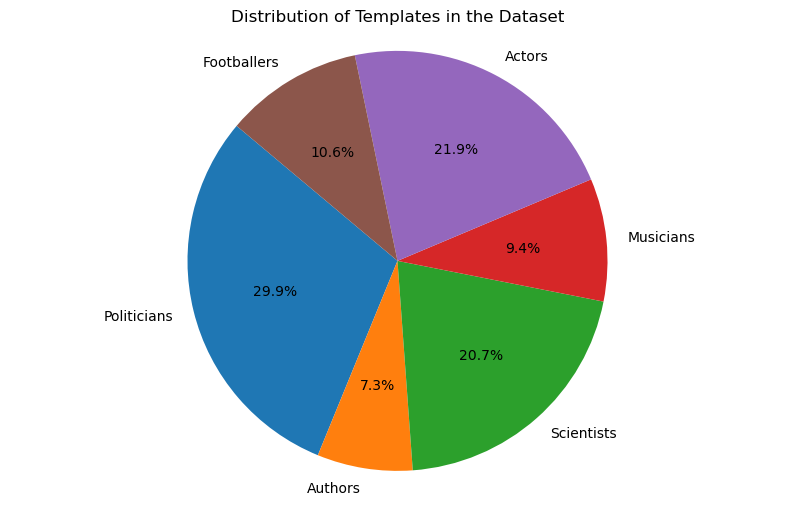

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of rows in each dataset
counts = {
    'Politicians': len(filtered_politicians_dataset),
    'Authors': len(filtered_authors_dataset),
    'Scientists': len(filtered_scientists_dataset),
    'Musicians': len(filtered_musicians_dataset),
    'Actors': len(filtered_actors_dataset),
    'Footballers': len(filtered_footballers_dataset)
}

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Templates in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [57]:
import pandas as pd

# Concatenate the text from the specified columns
text_data = merged_dataset['Όνομα'].astype(str) + ' ' + \
            merged_dataset['Πεδίο'].astype(str) + ' ' + \
            merged_dataset['Τόπος Γέννησης'].astype(str) + ' ' + \
            merged_dataset['Περιγραφή'].astype(str)

# Split the text into individual words
words = text_data.str.split()

# Flatten the list of lists and convert to a single list of words
all_words = [word for sublist in words for word in sublist]

# Count the unique words
unique_words = set(all_words)
unique_word_count = len(unique_words)

print(f"Number of unique words in the dataset: {unique_word_count}")


Number of unique words in the dataset: 4219


In [60]:
# Store the merged dataset in xlsx format
file_path = 'Greek_D2T_dataset.xlsx'
merged_dataset.to_excel(file_path, index=False)

print(f"The merged dataset has been saved to {file_path}")

The merged dataset has been saved to Greek_D2T_dataset.xlsx
